In [1]:
!python --version

Python 3.6.9


### Archivo y Ruta de Peliculas

In [2]:
import pandas as pd 

In [3]:
ruta_pelicula = "/content/drive/MyDrive/Colab Notebooks/Sistema_Recomendacion_Peliculas/movies.csv"

detalle_peliculas = pd.read_csv(ruta_pelicula)
detalle_peliculas.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# Detalles de las peliculas
detalle_peliculas.shape

(9742, 3)

In [5]:
detalle_peliculas.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


### Archivo y Ruta de  Ratings 

In [6]:
#
ruta_ratings="/content/drive/MyDrive/Colab Notebooks/Sistema_Recomendacion_Peliculas/ratings.csv"
#

detalle_ratings = pd.read_csv(ruta_ratings)
detalle_ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [7]:
# Detalles de los ratings
detalle_ratings.shape

(100836, 4)

In [8]:
detalle_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


### Unir los 2 datasets con la columna en comun 

In [9]:
#dataset = pd.merge(detalle_peliculas, detalle_ratings, on='movieId')
#dataset.tail()

In [10]:
dataset = pd.merge(detalle_ratings, detalle_peliculas, on='movieId')
dataset.tail()

,userId,movieId,rating,timestamp,title,genres
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller
100835,610,163981,3.5,1493850155,31 (2016),Horror


In [11]:
##### Convertir Tiempo
from datetime import datetime
dataset['datetime']= pd.to_datetime(dataset['timestamp'], unit= 's')
print(dataset.shape)
dataset.head()

(100836, 7)


,userId,movieId,rating,timestamp,title,genres,datetime
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2000-07-30 18:45:03
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1996-11-08 06:36:02
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2005-01-25 06:52:26
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2017-11-13 12:59:30
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2011-05-18 05:28:03


### Puntuación Media

In [12]:
media=dataset
media=media.groupby('title')['rating'].mean()
media

title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: rating, Length: 9719, dtype: float64

In [13]:
clasificaciones_ordenadas_películas = media.sort_values(ascending=False)
clasificaciones_ordenadas_películas

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
                                                ... 
The Beast of Hollow Mountain (1956)              0.5
Follow Me, Boys! (1966)                          0.5
The Butterfly Effect 3: Revelations (2009)       0.5
The Emoji Movie (2017)                           0.5
Rust and Bone (De rouille et d'os) (2012)        0.5
Name: rating, Length: 9719, dtype: float64

### Numero total de Ratings para una pelicula en particular

In [14]:
rating_por_movie = dataset.groupby('title')['rating'].count()
rating_por_movie.head(10)

title
'71 (2014)                                  1
'Hellboy': The Seeds of Creation (2004)     1
'Round Midnight (1986)                      2
'Salem's Lot (2004)                         1
'Til There Was You (1997)                   2
'Tis the Season for Love (2015)             1
'burbs, The (1989)                         17
'night Mother (1986)                        1
(500) Days of Summer (2009)                42
*batteries not included (1987)              7
Name: rating, dtype: int64

### Nuevo Dataframe con la informacion obtenida

In [15]:
new_df = pd.DataFrame()
new_df['Puntuacion Media']=media
new_df['Numero Total de Ratings']=rating_por_movie
print(new_df.shape)
new_df.head()

(9719, 2)


,Puntuacion Media,Numero Total de Ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


### Importar la Libreria de Visualizacion

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline
new_df.columns

Index(['Puntuacion Media', 'Numero Total de Ratings'], dtype='object')

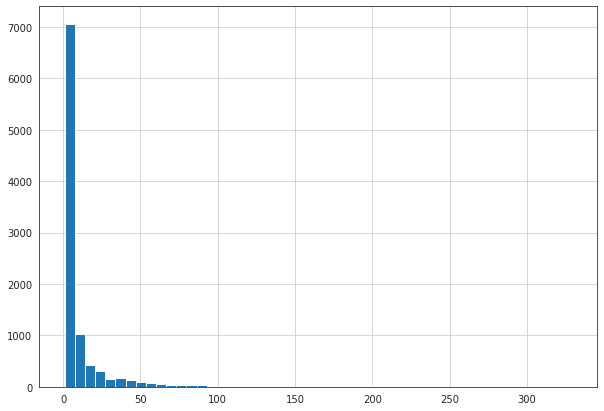

In [17]:
plt.figure(figsize=(10,7))
new_df['Numero Total de Ratings'].hist(bins = 50)

* Esta grafica muestra

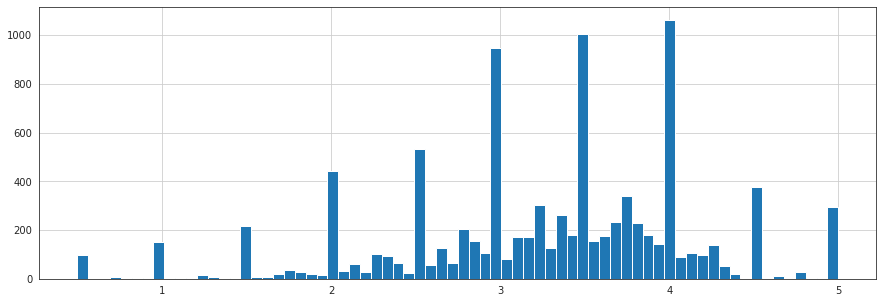

In [18]:
plt.figure(figsize=(15,5))
new_df['Puntuacion Media'].hist(bins = 70)

* La grafica representa el numero de peliculas por promedio de calificacion siendo 4. 3.5 y 3 las calificaciones mas altas

In [19]:
c = new_df.sort_values(by='Numero Total de Ratings', ascending=False)
c.head(15)

,Puntuacion Media,Numero Total de Ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


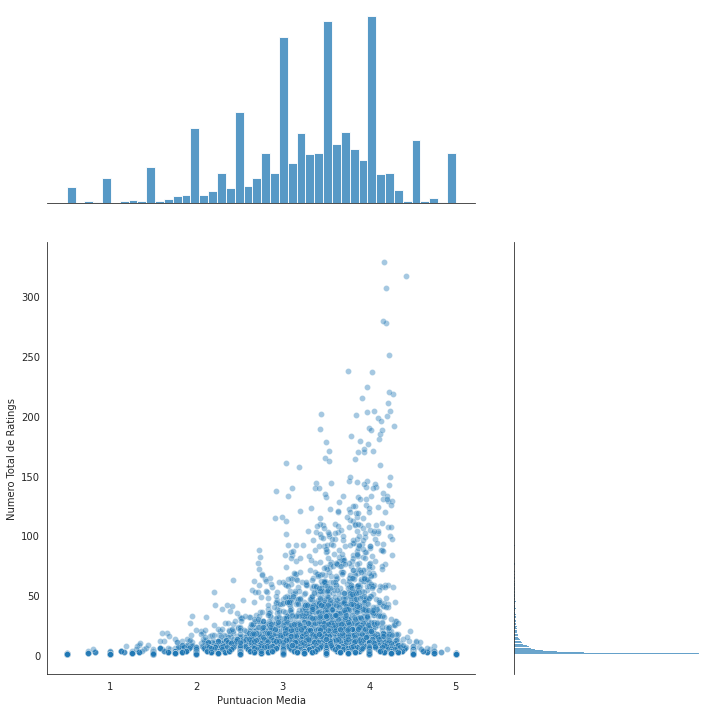

In [20]:
#plt.figure(figsize=(8,6))
sns.jointplot(x= 'Puntuacion Media', y='Numero Total de Ratings', data=new_df, alpha=0.4, height=10, ratio=2)

* Dibuja una gráfica de dos variables con gráficas bivariadas y univariadas.

In [21]:
# ordenar los valores según el Numero Total de Ratings
matrix_peliculas = dataset.pivot_table(index='userId', columns='title', values='rating')
matrix_peliculas.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [22]:
print("Before: ",matrix_peliculas.shape)
matrix_peliculas = matrix_peliculas.dropna(thresh=10, axis=1).fillna(0,axis=1)
#userRatings.fillna(0, inplace=True)
print("After: ",matrix_peliculas.shape)

Before:  (610, 9719)
After:  (610, 2269)


In [23]:
matrix_peliculas.columns.values

array(["'burbs, The (1989)", '(500) Days of Summer (2009)',
       '10 Cloverfield Lane (2016)', ..., 'eXistenZ (1999)', 'xXx (2002)',
       '¡Three Amigos! (1986)'], dtype=object)

In [24]:
corrMatrix = matrix_peliculas.corr(method='pearson')
corrMatrix.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),13 Going on 30 (2004),"13th Warrior, The (1999)",1408 (2007),15 Minutes (2001),17 Again (2009),1984 (Nineteen Eighty-Four) (1984),2 Days in the Valley (1996),"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)","20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),2010: The Year We Make Contact (1984),2012 (2009),21 (2008),21 Grams (2003),21 Jump Street (2012),22 Jump Street (2014),25th Hour (2002),27 Dresses (2008),28 Days (2000),28 Days Later (2002),28 Weeks Later (2007),30 Days of Night (2007),300 (2007),"39 Steps, The (1935)",3:10 to Yuma (2007),40 Days and 40 Nights (2002),"40-Year-Old Virgin, The (2005)","400 Blows, The (Les quatre cents coups) (1959)",48 Hrs. (1982),50 First Dates (2004),...,"Wolf of Wall Street, The (2013)","Wolverine, The (2013)",Women on the Verge of a Nervous Breakdown (Mujeres al borde de un ataque de nervios) (1988),Wonder Boys (2000),Wonder Woman (2017),Working Girl (1988),"World Is Not Enough, The (1999)",World War Z (2013),"World's End, The (2013)",Wreck-It Ralph (2012),"Wrestler, The (2008)",Wyatt Earp (1994),"X-Files: Fight the Future, The (1998)",X-Men (2000),X-Men Origins: Wolverine (2009),X-Men: Apocalypse (2016),X-Men: Days of Future Past (2014),X-Men: First Class (2011),X-Men: The Last Stand (2006),X2: X-Men United (2003),Yellow Submarine (1968),Yes Man (2008),Yojimbo (1961),You Don't Mess with the Zohan (2008),You Only Live Twice (1967),You've Got Mail (1998),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),Young Sherlock Holmes (1985),Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,0.049700,0.176071,0.131993,0.104500,0.047271,0.184452,0.092824,0.084066,0.166599,0.205977,0.187019,0.006377,-0.027152,0.035609,-0.014293,-0.027713,0.099271,-0.028021,0.107001,0.117119,-0.028967,0.144642,0.109059,0.021677,0.131405,0.115386,0.124265,-0.022021,0.255706,0.024466,...,-0.001830,0.006420,-0.019439,0.194225,0.080328,0.160591,0.061280,-0.027261,0.031088,0.043787,0.081831,0.075004,0.213522,0.195512,0.087015,0.007059,-0.011004,0.049537,0.119975,0.098020,0.115369,0.016625,0.042313,-0.023309,0.021379,0.172502,0.201374,0.248535,0.088114,0.257195,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,0.297152,0.072835,0.226574,0.087240,0.342948,0.038255,0.040104,0.241906,0.001739,0.113616,0.030603,0.274272,0.285043,0.094029,0.284552,0.194200,0.086447,0.205511,0.048670,0.149167,0.157145,0.249836,0.343028,-0.034688,0.252980,0.174618,0.344805,0.023625,0.156628,0.314037,...,0.241685,0.207393,0.040382,0.100958,0.225268,0.044576,0.031382,0.265563,0.303689,0.126481,0.388055,0.023020,0.031399,0.184228,0.320018,0.238263,0.288610,0.349784,0.274941,0.190061,0.034780,0.407336,0.029789,0.144834,-0.012948,0.140981,0.066077,0.073476,0.053263,0.053021,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,-0.027835,-0.029983,0.181245,0.017315,-0.019197,0.049227,-0.020711,0.097364,0.012478,0.099310,-0.025037,0.205739,0.082904,-0.030166,0.309963,0.292432,0.092291,-0.026642,-0.008488,0.228241,0.231702,0.263072,0.170440,-0.019994,0.104868,0.081960,0.145923,0.033310,0.147068,0.025681,...,0

In [25]:
def get_similar(movie_name,rating):
    similar_ratings = corrMatrix[movie_name]*(rating-2.5)
    similar_ratings = similar_ratings.sort_values(ascending=False)
    #print(type(similar_ratings))
    return similar_ratings

### Similares Peliculas Romanticas 

In [26]:
romantic_lover = [("(500) Days of Summer (2009)",5),("Alice in Wonderland (2010)",3),("Aliens (1986)",1),("2001: A Space Odyssey (1968)",2)]
similar_movies = pd.DataFrame()
for movie,rating in romantic_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head()

,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),13 Going on 30 (2004),"13th Warrior, The (1999)",1408 (2007),15 Minutes (2001),17 Again (2009),1984 (Nineteen Eighty-Four) (1984),2 Days in the Valley (1996),"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)","20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),2010: The Year We Make Contact (1984),2012 (2009),21 (2008),21 Grams (2003),21 Jump Street (2012),22 Jump Street (2014),25th Hour (2002),27 Dresses (2008),28 Days (2000),28 Days Later (2002),28 Weeks Later (2007),30 Days of Night (2007),300 (2007),"39 Steps, The (1935)",3:10 to Yuma (2007),40 Days and 40 Nights (2002),"40-Year-Old Virgin, The (2005)","400 Blows, The (Les quatre cents coups) (1959)",48 Hrs. (1982),50 First Dates (2004),...,"Wolf of Wall Street, The (2013)","Wolverine, The (2013)",Women on the Verge of a Nervous Breakdown (Mujeres al borde de un ataque de nervios) (1988),Wonder Boys (2000),Wonder Woman (2017),Working Girl (1988),"World Is Not Enough, The (1999)",World War Z (2013),"World's End, The (2013)",Wreck-It Ralph (2012),"Wrestler, The (2008)",Wyatt Earp (1994),"X-Files: Fight the Future, The (1998)",X-Men (2000),X-Men Origins: Wolverine (2009),X-Men: Apocalypse (2016),X-Men: Days of Future Past (2014),X-Men: First Class (2011),X-Men: The Last Stand (2006),X2: X-Men United (2003),Yellow Submarine (1968),Yes Man (2008),Yojimbo (1961),You Don't Mess with the Zohan (2008),You Only Live Twice (1967),You've Got Mail (1998),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),Young Sherlock Holmes (1985),Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
0,0.157792,2.500000,0.356179,0.684973,0.484900,0.372257,0.355353,0.399389,0.338715,0.500338,0.742880,0.182086,0.566435,0.218100,0.857371,0.095638,0.100260,0.604765,0.004346,0.284040,0.076507,0.685679,0.712607,0.235073,0.711380,0.485500,0.216117,0.513778,0.121674,0.372917,0.392863,0.624589,0.857569,-0.086719,0.632451,0.436544,0.862011,0.059063,0.391570,0.785093,...,0.604212,0.518482,0.100956,0.252396,0.563169,0.111440,0.078455,0.663908,0.759222,0.316203,0.970138,0.057550,0.078497,0.460569,0.800044,0.595656,0.721526,0.874460,0.687353,0.475153,0.086949,1.018339,0.074473,0.362084,-0.032370,0.352452,0.165193,0.183691,0.133157,0.132553,0.936288,0.446637,0.171018,1.036463,0.889309,0.630565,0.540017,0.134034,0.602730,0.314763
1,-0.016276,0.203998,0.126834,0.113241,0.092218,0.085790,0.072825,0.097794,0.083822,0.084897,0.070942,0.033046,0.088996,0.039326,0.036662,0.004236,-0.014182,0.080120,0.019996,0.052156,-0.017145,0.136631,0.154479,0.022982,0.164181,0.074246,0.051010,0.072348,0.063130,0.066988,0.119319,0.135426,0.168577,-0.013692,0.125044,0.105436,0.121399,0.021876,0.038626,0.103665,...,0.116989,0.102592,0.011657,0.037273,0.103954,-0.004786,0.055923,0.129023,0.175285,0.090932,0.133419,-0.005539,-0.005046,0.086705,0.141647,0.116445,0.156137,0.149189,0.120647,0.074533,0.049126,0.135936,0.015668,0.086449,0.033706,0.080562,0.044429,0.034986,0.022495,0.011642,0.159907,0.085502,0.011564,0.176888,0.168302,0.121710,0.072590,0.025695,0.081764,0.027540
2,-0.304722,-0.062634,-0.214700,-0.118754,-0.037059,-0.063992,-0.170195,-0.280090,-0.016283,-0.102493,-0.011519,-0.359571,-0.286816,-0.178681,-0.047470,-0.414839,-0.343898,-0.162222,-0.311814,-0.703178,-0.340034,-0.086430,0.002338,-0.229444,-0.140212,-0.116318,-0.359739,0.019416,-0.194484,-0.439946,-0.326470,-0.252851,-0.336779,-0.212407,-0.177874,-0.102550,-0.234830,-0.063755,-0.365430,-0.170842,...,-0.019504,-0.162350,-0.176443,-0.300007,-0.182417,-0.239451,-0.327480,-0.247737,-0.281949,-0.164179,-0.307945,-0.126949,-0.479673,-0.468311,-0.

In [27]:
similar_movies.sum().sort_values(ascending=False).head(30)

(500) Days of Summer (2009)                            2.584556
Alice in Wonderland (2010)                             1.395229
Silver Linings Playbook (2012)                         1.254800
Yes Man (2008)                                         1.116264
Adventureland (2009)                                   1.112235
Marley & Me (2008)                                     1.108381
About Time (2013)                                      1.102192
Crazy, Stupid, Love. (2011)                            1.088757
50/50 (2011)                                           1.086517
Help, The (2011)                                       1.075963
Up in the Air (2009)                                   1.053037
Holiday, The (2006)                                    1.034470
Friends with Benefits (2011)                           1.030875
Notebook, The (2004)                                   1.025880
Easy A (2010)                                          1.015771
Secret Life of Walter Mitty, The (2013) 

### Similares Peliculas de Accion

In [28]:
action_lover = [("Godfather, The (1972)",5),("Godfather: Part II, The (1974)",5),("Toy Story 3 (2010)",2),("Scarface (1983)",5)]
similar_movies = pd.DataFrame()
for movie,rating in action_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)
similar_movies.sum().sort_values(ascending=False).head(30)

Godfather, The (1972)                                                        5.338652
Godfather: Part II, The (1974)                                               5.281068
Scarface (1983)                                                              4.369067
Goodfellas (1990)                                                            3.662933
Reservoir Dogs (1992)                                                        3.423120
One Flew Over the Cuckoo's Nest (1975)                                       3.164371
Apocalypse Now (1979)                                                        2.925735
Full Metal Jacket (1987)                                                     2.880662
Departed, The (2006)                                                         2.790275
Taxi Driver (1976)                                                           2.782544
Trainspotting (1996)                                                         2.763420
Fargo (1996)                                          

### Similares Peliculas de Animadas

In [29]:
animation_lover = [("Minions (2015)",5),("Toy Story 3 (2010)",5),("Scarface (1983)",2),("Up (2009)",4),("Toy Story (1995)",5)]
similar_movies = pd.DataFrame()
for movie,rating in animation_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)
similar_movies.sum().sort_values(ascending=False).head(30)

Toy Story 3 (2010)                           4.304195
Toy Story (1995)                             3.555014
Up (2009)                                    3.484633
Minions (2015)                               3.285870
Inside Out (2015)                            2.908597
Ted (2012)                                   2.798785
Kung Fu Panda (2008)                         2.780670
Ratatouille (2007)                           2.732377
Avatar (2009)                                2.699476
Sherlock Holmes (2009)                       2.686079
Hangover, The (2009)                         2.623518
The Lego Movie (2014)                        2.602794
A-Team, The (2010)                           2.593379
Brave (2012)                                 2.592516
Madagascar (2005)                            2.575164
X-Men: First Class (2011)                    2.550101
Internship, The (2013)                       2.537687
WALL·E (2008)                                2.510227
Big Hero 6 (2014)           

### Similares Peliculas de Guerra

In [30]:
iiwar_lover = [("Dunkirk (2017)",5),("Saving Private Ryan (1998)",5),("Aladdin (1992)",1),("Full Metal Jacket (1987)",5),("Paths of Glory (1957)",5)]
similar_movies = pd.DataFrame()
for movie,rating in iiwar_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)
similar_movies.sum().sort_values(ascending=False).head(30)

Paths of Glory (1957)                                                          4.394572
Full Metal Jacket (1987)                                                       4.142341
Saving Private Ryan (1998)                                                     4.047963
Dunkirk (2017)                                                                 3.960066
Clockwork Orange, A (1971)                                                     3.170102
Reservoir Dogs (1992)                                                          3.102869
Donnie Brasco (1997)                                                           3.007065
Blade Runner 2049 (2017)                                                       2.919113
2001: A Space Odyssey (1968)                                                   2.874615
Apocalypse Now (1979)                                                          2.854865
Blade Runner (1982)                                                            2.854265
Big Lebowski, The (1998)        

### Similares Peliculas de Terror

In [31]:
terror_lover = [("Exorcist, The (1973)",5),("Nightmare on Elm Street 2: Freddy's Revenge, A (1985)",4),("Aladdin (1992)",1),("Blair Witch Project, The (1999)",5),("Ring, The (2002)",5)]
similar_movies = pd.DataFrame()
for movie,rating in terror_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)
similar_movies.sum().sort_values(ascending=False).head(30)

Exorcist, The (1973)                      3.993814
Blair Witch Project, The (1999)           3.583007
Ring, The (2002)                          3.333927
Poltergeist (1982)                        2.631471
Rosemary's Baby (1968)                    2.584341
Scream (1996)                             2.544887
Shining, The (1980)                       2.526207
Omen, The (1976)                          2.481090
Gremlins (1984)                           2.480161
Sleepy Hollow (1999)                      2.463242
Alien (1979)                              2.453469
Fly, The (1986)                           2.404348
American Psycho (2000)                    2.365521
Psycho (1960)                             2.348097
Others, The (2001)                        2.347688
Misery (1990)                             2.340600
Planet of the Apes (1968)                 2.335379
Jaws (1975)                               2.317074
Hannibal (2001)                           2.315933
Halloween (1978)               